## testTopHatFilter

Develop and test a top-hat filter for hyperspy

This is based upon Peter J. Statham, Deconvolution and Background Subtraction by Least-Squares Fitting with Prefiltering of Spectra, *Analytical Chemistry*, **49**(14), 2149-2154 (1977). Note that for a peak of FWHM of 7.5 channels, Staham defines the optimum width as 15 channels with a central 'hat' of 7 channels and outer 'brim' of 4 channels on each side. The function defined here has been included in the jmToolsPy2 packagge.

First, let's define what we need for the iPython Notebook.

In [1]:
%matplotlib inline
import os
import shutil
import numpy as np
import jmToolsPy2 as jmt
import matplotlib.pyplot as plt
import hyperspy.hspy as hs
# set the default figure size
plt.rcParams['figure.figsize'] = 11, 7

Now, define the ``topHatFilter`` function

In [2]:
def topHatFilter(spc, m=3, n=4, bVerbose=False):
    """topHatFilter(spc, m=3, n=4, bVerbose=False)
    Apply a top-hat filter to a spectrum. The filter has a 'hat' of width
    (2*m+1) and a 'brim' on each side of width (n). It returns a filtered
    spectrum.
    
    This is based upon Peter J. Statham, Deconvolution and Background
    Subtraction by Least-Squares Fitting with Prefiltering of Spectra,
    Analytical Chemistry, 49(14), 2149-2154 (1977).
    """
    filt = spc.deepcopy()
    dat = spc.data
    if bVerbose:
        print(dat.shape)
    w = (2*n)+(2*m+1)
    if bVerbose:
        print(w)
    brim = -1.0*np.ones(n)
    hat = np.ones(2*m+1)
    th = np.hstack((brim, hat, brim))
    cv = np.convolve(dat, th, mode='full')
    res = cv[(n+m):(dat.shape[0]+n+m)]
    filt.data = res
    if bVerbose:
        print(len(res))
    return filt
    

Now, let's define some environment variables that will let us load some helpful exemplar data

In [3]:
edsDir = os.environ['EDS_ROOT']
ePrjDir = "QM15-04-07A-Ciminelli"
sampID = "qm-04396-KR156C004-S068-fib"
mapID = "7kV-map1"   
datDir = "/Oxford/" + ePrjDir + "/reports/" + sampID + "/" + sampID + "-" + mapID
relStd = datDir + "/raw/sim-stds"
relCub = datDir + "/raw"
inStd  = edsDir + relStd
inCub  = edsDir + relCub
basNam = sampID + "-" + mapID
detGain = 5.0030  # 5.0030±0.0004
detOff  = -103.30 # -103.30±0.33
scFactor = 0.007070 # the scale factor for the 65kX map (1024-> 512px) in µm

In [4]:
inFil = inStd + '/Cu-sim-7kV.msa'
cuSpc = hs.load(inFil, signal_type='EDS_SEM')
cuSpc

<EDSSEMSpectrum, title: cu-sim-7kV, dimensions: (|2048)>

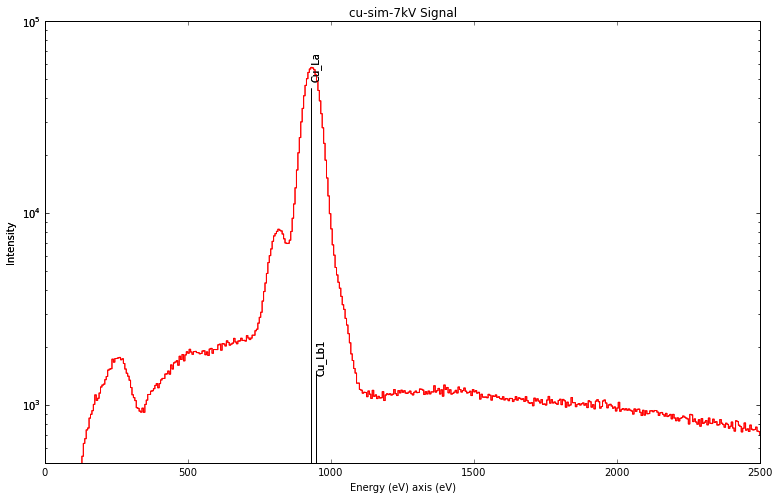

In [5]:
cuSpc.set_elements(['Cu'])
cuSpc.plot(True)
ax = plt.gca() # get current axes
ax.set_yscale("log")
ax.set_xlim(left=0, right=2500)
ax.set_ylim((500, 100000))
ax.figure.canvas.draw()

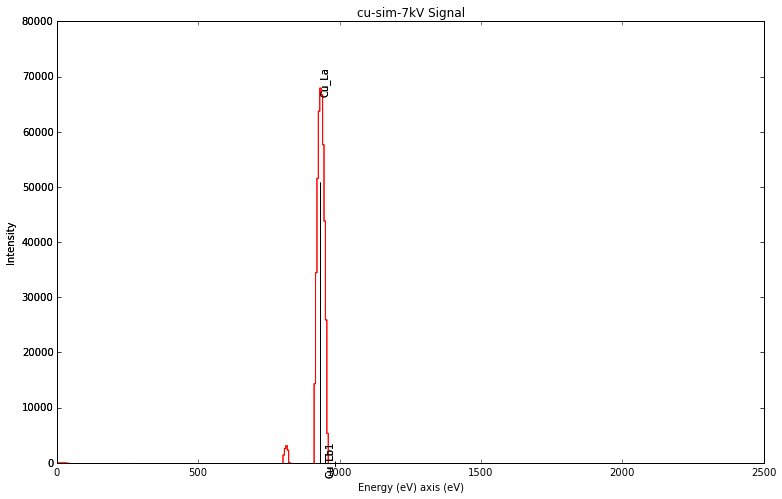

In [6]:
cuFilt = jmt.topHatFilter(cuSpc)
cuFilt.set_elements(['Cu'])
cuFilt.plot(True)
ax = plt.gca() # get current axes
ax.set_xlim(left=0, right=2500)
ax.set_ylim((1, 80000))
ax.figure.canvas.draw()

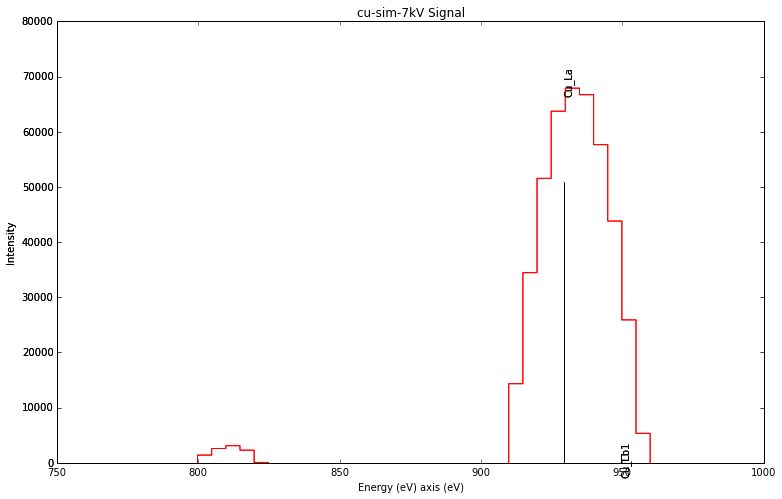

In [7]:
cuFilt.plot(True)
ax = plt.gca() # get current axes
ax.set_xlim(left=750, right=1000)
ax.set_ylim((1, 80000))
ax.figure.canvas.draw()

In [8]:
inFil = inStd + '/Pd-sim-7kV.msa'
pdSpc = hs.load(inFil, signal_type='EDS_SEM')
pdSpc

<EDSSEMSpectrum, title: Pd-sim-7kV, dimensions: (|2048)>

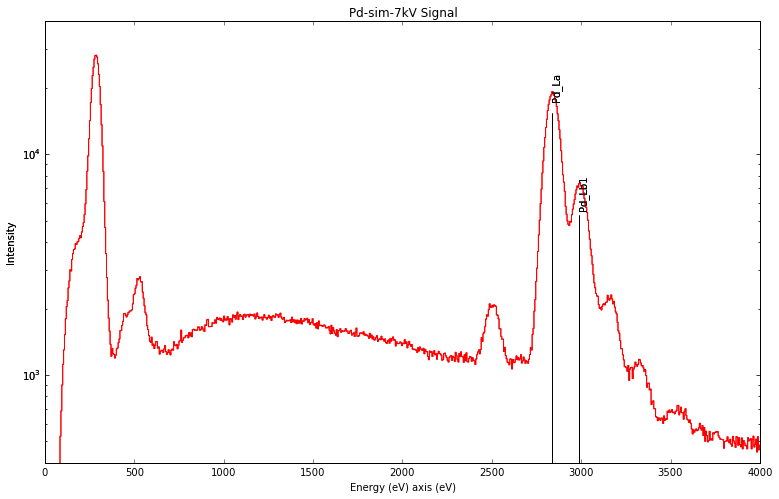

In [9]:
pdSpc.set_elements(['Pd'])
pdSpc.plot(True)
ax = plt.gca() # get current axes
ax.set_yscale("log")
ax.set_xlim(left=0, right=4000)
ax.set_ylim((400, 40000))
ax.figure.canvas.draw()

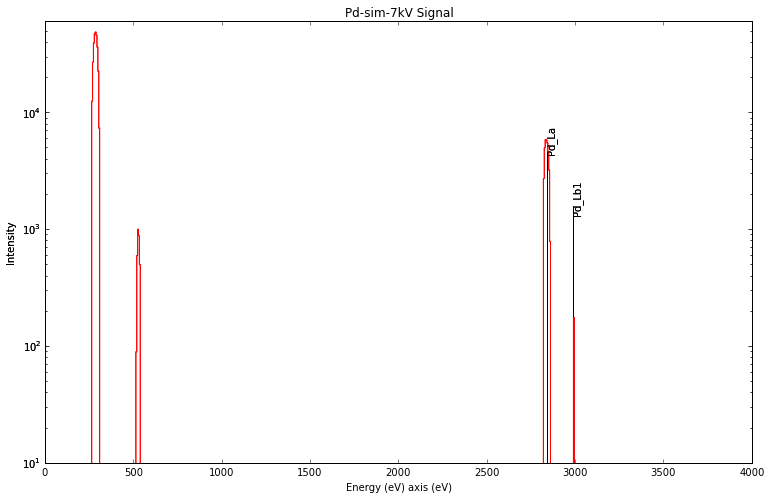

In [10]:
pdFilt = jmt.topHatFilter(pdSpc)
pdFilt.set_elements(['Pd'])
pdFilt.plot(True)
ax = plt.gca() # get current axes
ax.set_yscale("log")
ax.set_xlim(left=0, right=4000)
ax.set_ylim((10, 60000))
ax.figure.canvas.draw()

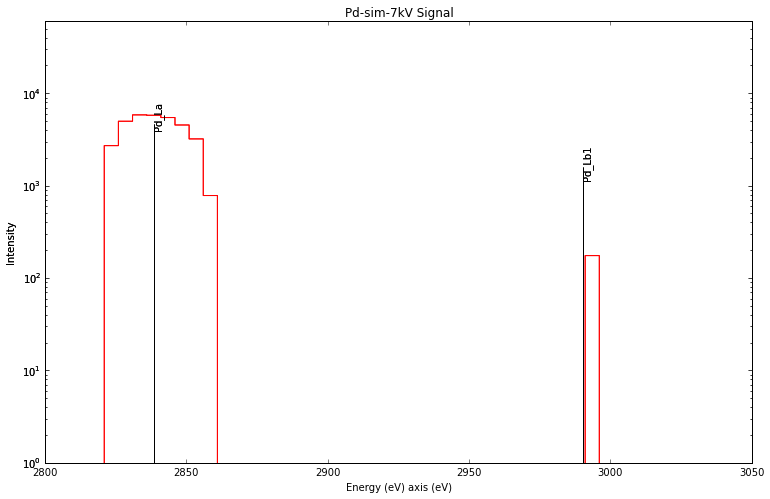

In [11]:
pdFilt.plot(True)
ax = plt.gca() # get current axes
ax.set_yscale("log")
ax.set_xlim(left=2800, right=3050)
ax.set_ylim((1, 60000))
ax.figure.canvas.draw()

In [12]:
rawFile = basNam + '.raw'
rplFile = basNam + '.rpl'
spcFile = basNam + '-sum.msa'
os.chdir(inCub)
dc = hs.load(rplFile, signal_type='EDS_SEM')
dc

Loading as Image


<Image, title: , dimensions: (2048|512, 219)>

In [13]:
dc.metadata

├── General
│   ├── original_filename = qm-04396-KR156C004-S068-fib-7kV-map1.rpl
│   └── title = 
└── Signal
    ├── binned = False
    ├── record_by = image
    ├── signal_origin = 
    └── signal_type = EDS_SEM

In [14]:
sdc=dc.as_spectrum(0)
sdc.set_signal_type('EDS_SEM')
sdc

<EDSSEMSpectrum, title: , dimensions: (512, 219|2048)>

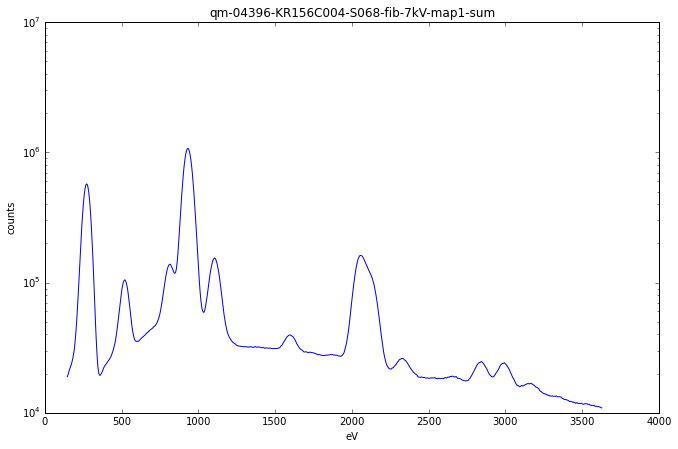

In [15]:
spc = hs.load(spcFile, signal_type='EDS_SEM')
sdc.get_calibration_from(spc)
jmt.plotEdsSpc(spc, logY=True, crL=50, crR=1300)

In [16]:
sdc.metadata

├── Acquisition_instrument
│   └── SEM
│       ├── Detector
│       │   └── EDS
│       │       ├── EDS_det = u'SDDUTW'
│       │       ├── azimuth_angle = 225.0
│       │       ├── elevation_angle = 35.0
│       │       ├── energy_resolution_MnKa = 130.0
│       │       ├── live_time = 3935.69287
│       │       └── real_time = 4394.42578
│       ├── beam_current = 0.0
│       ├── beam_energy = 7.0
│       └── tilt_stage = 0.0
├── General
│   ├── original_filename = qm-04396-KR156C004-S068-fib-7kV-map1.rpl
│   └── title = 
└── Signal
    ├── binned = True
    ├── record_by = spectrum
    ├── signal_origin = 
    └── signal_type = EDS_SEM

In [17]:
names = ['x', 'y']
units = '${\\mu}m$'
scales = [scFactor, scFactor]

C:\Apps\Anaconda\lib\site-packages\matplotlib\axes\_base.py:1057: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if aspect == 'normal':
C:\Apps\Anaconda\lib\site-packages\matplotlib\axes\_base.py:1062: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif aspect in ('equal', 'auto'):


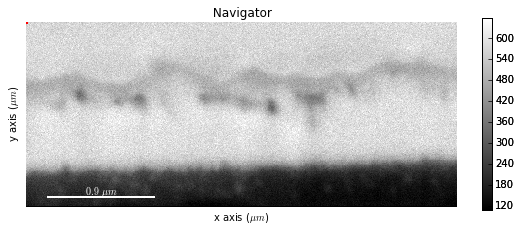

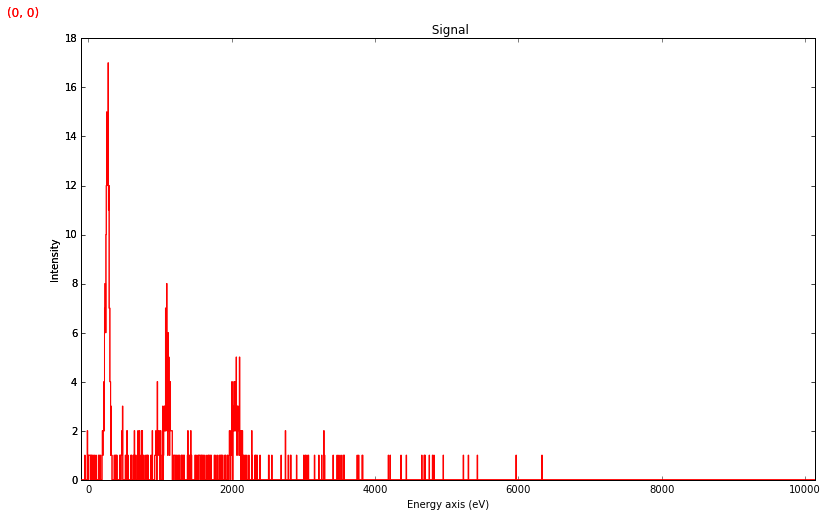

In [18]:
sdc.get_calibration_from(spc)
sdc.axes_manager[-1].name = 'Energy'
for i in range(2):
    ax = sdc.axes_manager[i]
    ax.name = names[i]
    ax.units = units
    ax.scale = scales[i]

sdc.plot()

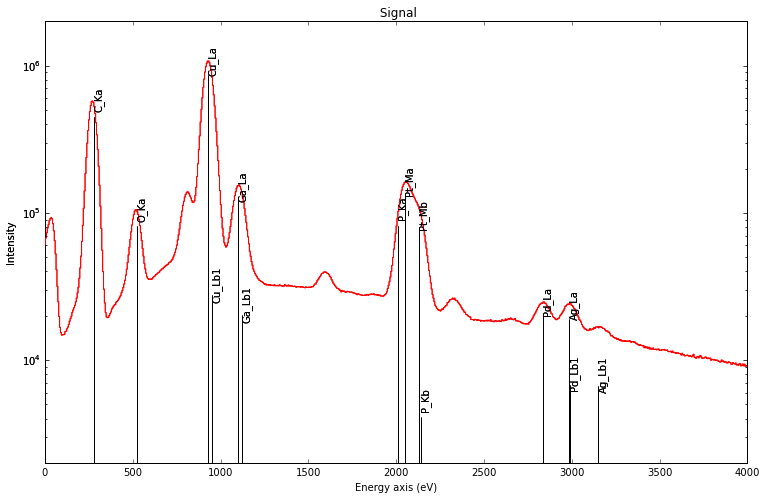

In [19]:
elements = ['C', 'Cu', 'P', 'O', 'Ga', 'Pd', 'Ag', 'Pt']
sdc.set_elements(elements)
sdc.sum(0).sum(0).plot(True)
ax = plt.gca() # get current axes
ax.set_yscale("log")
ax.set_xlim(left=0, right=4000)
ax.set_ylim((2000, 2000000))
ax.figure.canvas.draw()

Look at a locations in the Cu layer and Pd layer

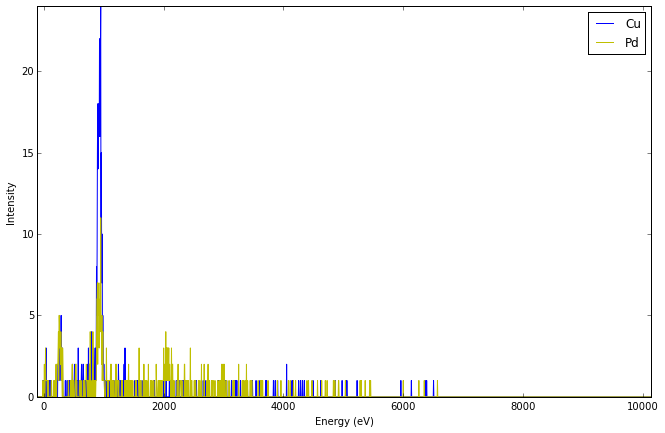

In [20]:
hs.utils.plot.plot_spectra([sdc[256, 110], sdc[180, 53 ]], color=['b', 'y'], legend=['Cu', 'Pd'])

In [20]:
cuRich = sdc[256, 110]
pdRich = sdc[180, 53 ]
pdRich

<EDSSEMSpectrum, title: , dimensions: (|2048)>

In [36]:
pdRichTF = jmt.topHatFilter(pdRich)
el = ['Cu', 'Pd']
pdRichTF.metadata.Sample.elements = el
cuRichTF = jmt.topHatFilter(cuRich)
cuRichTF.metadata.Sample.elements = el

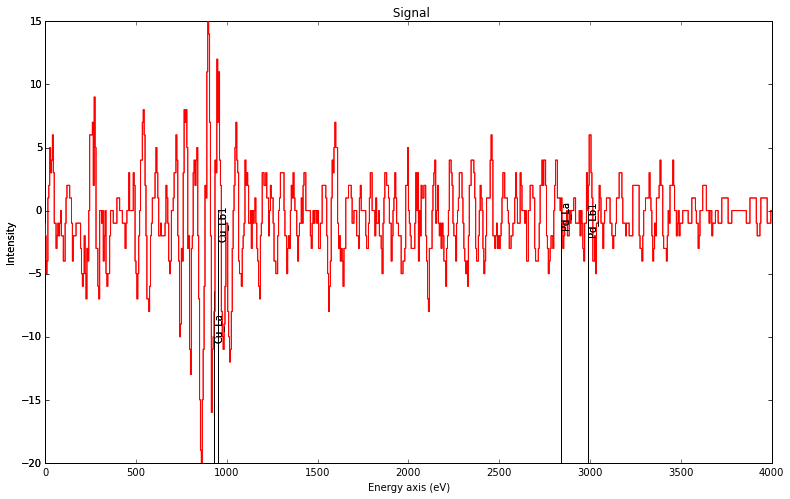

In [37]:
pdRichTF.plot(True)
ax = plt.gca() # get current axes
ax.set_xlim(left=0, right=4000)
# ax.set_ylim((2000, 2000000))
ax.figure.canvas.draw()

In [35]:
pdRichTF.metadata.Sample.elements =['Cu', 'Pd']
pdRichTF.metadata

├── Acquisition_instrument
│   └── SEM
│       ├── Detector
│       │   └── EDS
│       │       ├── EDS_det = u'SDDUTW'
│       │       ├── azimuth_angle = 225.0
│       │       ├── elevation_angle = 35.0
│       │       ├── energy_resolution_MnKa = 130.0
│       │       ├── live_time = 3935.69287
│       │       └── real_time = 4394.42578
│       ├── beam_current = 0.0
│       ├── beam_energy = 7.0
│       └── tilt_stage = 0.0
├── General
│   ├── original_filename = qm-04396-KR156C004-S068-fib-7kV-map1.rpl
│   └── title = 
├── Sample
│   └── elements = ['Cu', 'Pd']
├── Signal
│   ├── binned = True
│   ├── record_by = spectrum
│   ├── signal_origin = 
│   └── signal_type = EDS_SEM
└── elements = ['Cu', 'Pd']